# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_file = "D:\_Documents\_Data Analytics Material\Challenges\Module 6\python-api-challenge\WeatherPy\Starter_Code\output_data"

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 606
['linxia chengguanzhen', 'ushuaia', 'east london', 'klyuchi', 'ingeniero guillermo n. juarez', 'bethel', 'port-aux-francais', 'la ronge', 'saipan', 'isafjordur', 'taitung city', 'lerwick', 'edinburgh of the seven seas', 'puerto natales', 'idil', 'alofi', 'waitangi', 'munnerstadt', 'port mathurin', 'thompson', 'mount gambier', 'port elizabeth', 'papatowai', 'hamilton', 'uturoa', 'iqaluit', 'flying fish cove', 'ponta delgada', 'happy valley-goose bay', 'rameswaram', 'arraial do cabo', 'arar', 'cannonvale', 'lata', 'albany', 'bilibino', 'ancud', 'al kharijah', 'fort st. john', 'morogoro', 'hornell', 'whitehorse', 'adamstown', 'blackmans bay', 'bredasdorp', 'murashi', 'ilulissat', 'pestravka', 'hasaki', 'mukah', 'kudymkar', 'mount pleasant', 'hawaiian paradise park', 'talnakh', 'dunda', 'grytviken', 'kodiak', 'sola', 'qaqortoq', 'dapa', 'vorgashor', 'sishilichengzi', 'san patricio', 'saint-georges', 'flin flon', 'tolanaro', 'mount isa', 'invercargill', 'ar

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | linxia chengguanzhen
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | klyuchi
Processing Record 5 of Set 1 | ingeniero guillermo n. juarez
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | taitung city
Processing Record 12 of Set 1 | lerwick
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | idil
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | munnerstadt
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | mount gambier
Processing Re

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,linxia chengguanzhen,35.6003,103.2064,279.53,76,90,0.40,CN,1713478450
1,ushuaia,-54.8000,-68.3000,278.96,87,100,2.57,AR,1713478450
2,east london,-33.0153,27.9116,293.57,86,28,2.43,ZA,1713478450
3,klyuchi,52.2667,79.1667,287.15,80,86,5.23,RU,1713478454
4,ingeniero guillermo n. juarez,-23.9000,-61.8500,294.17,43,0,2.86,AR,1713478454


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv(output_file + "/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv(output_file + "/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,linxia chengguanzhen,35.6003,103.2064,279.53,76,90,0.40,CN,1713478450
1,ushuaia,-54.8000,-68.3000,278.96,87,100,2.57,AR,1713478450
2,east london,-33.0153,27.9116,293.57,86,28,2.43,ZA,1713478450
3,klyuchi,52.2667,79.1667,287.15,80,86,5.23,RU,1713478454
4,ingeniero guillermo n. juarez,-23.9000,-61.8500,294.17,43,0,2.86,AR,1713478454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

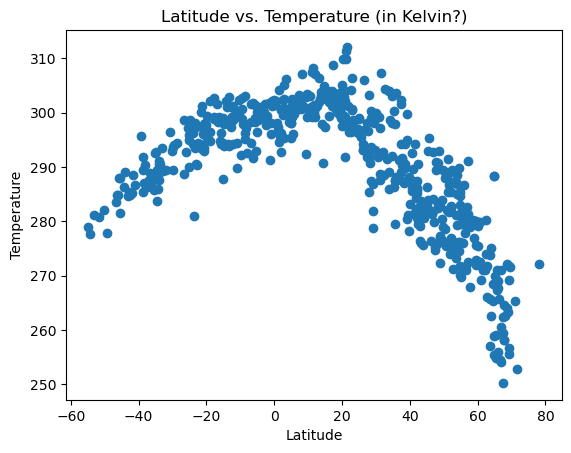

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (in Kelvin?)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Save the figure
plt.savefig(output_file + "/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

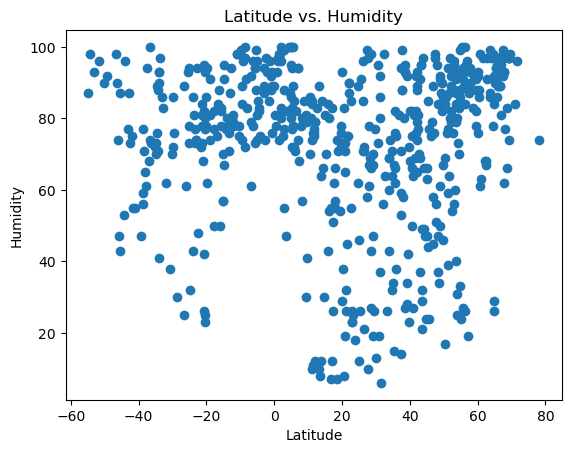

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig(output_file + "/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

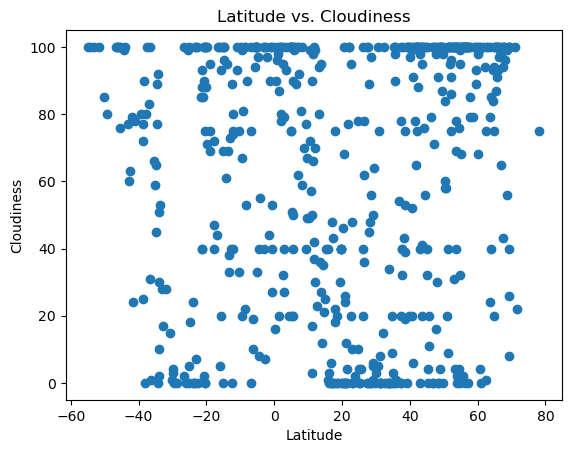

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig(output_file + "/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

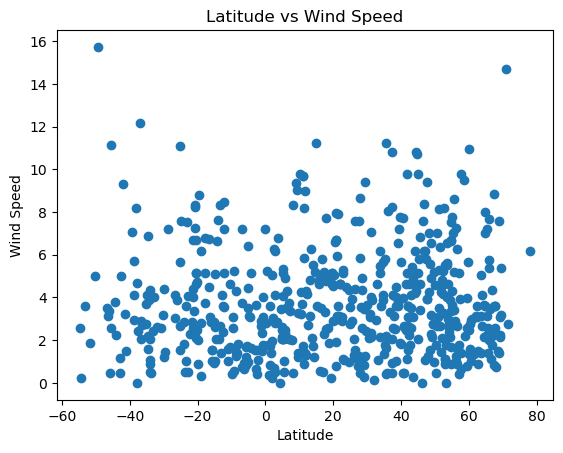

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig(output_file + "/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def lin_reg(df, y_value):
    plt.scatter(df['Lat'], df[y_value])
    plt.title("Latitude vs " + y_value)
    plt.xlabel("Latitude")
    plt.ylabel(y_value)

    m, b = np.polyfit(df['Lat'], df[y_value], 1)        #| These lines are from:
                                                        #| https://www.statology.org/scatterplot-with-regression-line-python/
    plt.plot(df['Lat'], m*(df['Lat']) + b, color='red') #|

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,linxia chengguanzhen,35.6003,103.2064,279.53,76,90,0.40,CN,1713478450
3,klyuchi,52.2667,79.1667,287.15,80,86,5.23,RU,1713478454
5,bethel,41.3712,-73.4140,281.35,81,100,4.63,US,1713478454
7,la ronge,55.1001,-105.2842,269.68,93,100,7.76,CA,1713478456
8,saipan,15.1355,145.7010,302.54,70,40,3.60,MP,1713478457


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,278.96,87,100,2.57,AR,1713478450
2,east london,-33.0153,27.9116,293.57,86,28,2.43,ZA,1713478450
4,ingeniero guillermo n. juarez,-23.9000,-61.8500,294.17,43,0,2.86,AR,1713478454
6,port-aux-francais,-49.3500,70.2167,277.80,92,80,15.73,TF,1713478455
12,edinburgh of the seven seas,-37.0676,-12.3116,287.54,68,83,12.16,SH,1713478464


###  Temperature vs. Latitude Linear Regression Plot

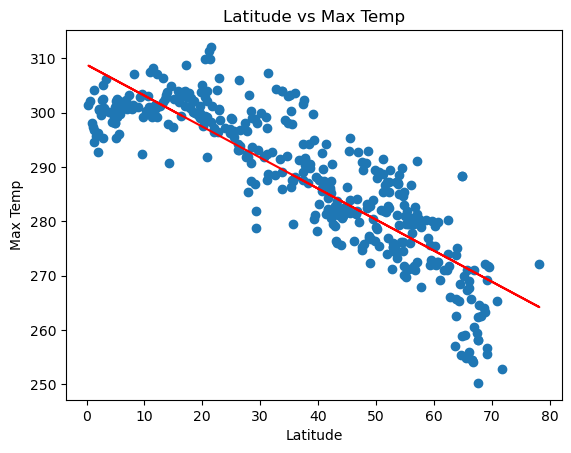

In [58]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df, "Max Temp")

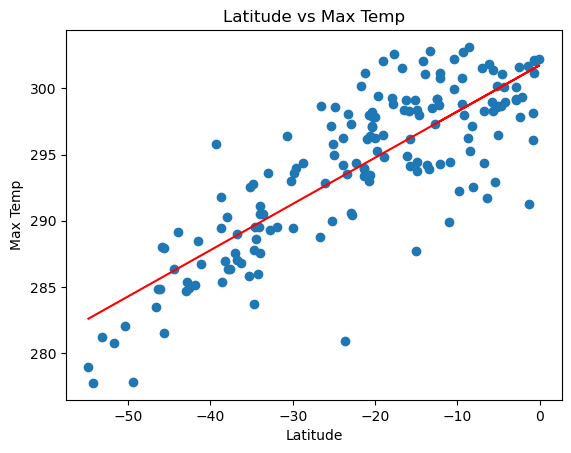

In [59]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df, "Max Temp")

**Discussion about the linear relationship:** The data that we're seeing makes sense, as the farther you are from the equator, the colder the average temperature tends to be. Further, if we're in the northern hemisphere, the higher the latitute, the closer to the North Pole we are. If we're in the Southern Hemisphere however, the lower the latitude, the lower the temperature because we're closer to the South Pole.

### Humidity vs. Latitude Linear Regression Plot

LinregressResult(slope=0.22316722420296703, intercept=62.27544263472826, rvalue=0.18078235541222612, pvalue=0.0002550783196447231, stderr=0.06047925382066491, intercept_stderr=2.5425920691655692)

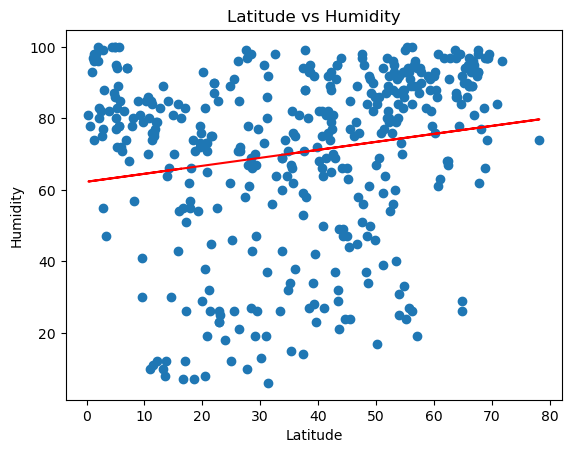

In [66]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Humidity")
linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

LinregressResult(slope=0.23951313951891587, intercept=82.64692332688048, rvalue=0.19885966000267197, pvalue=0.009985973419065841, stderr=0.09189230651680699, intercept_stderr=2.382112744135979)

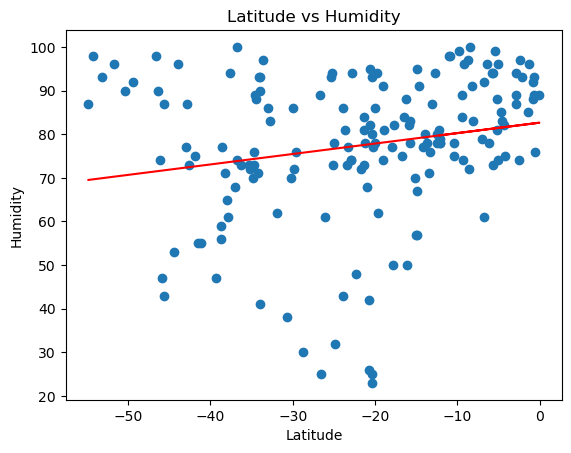

In [67]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Humidity")
linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** These two variables are not very correlated, as latitude isn't a strong indicator of humidity. Usually, proximity to water is the bigger determining factor in humidity levels. If we had that data, I would wager we'd have a much higher R value.

### Cloudiness vs. Latitude Linear Regression Plot

LinregressResult(slope=0.45559436775169226, intercept=44.114924168300305, rvalue=0.23013389632803102, pvalue=2.86869127966196e-06, stderr=0.09596857034204367, intercept_stderr=4.0345888949685405)

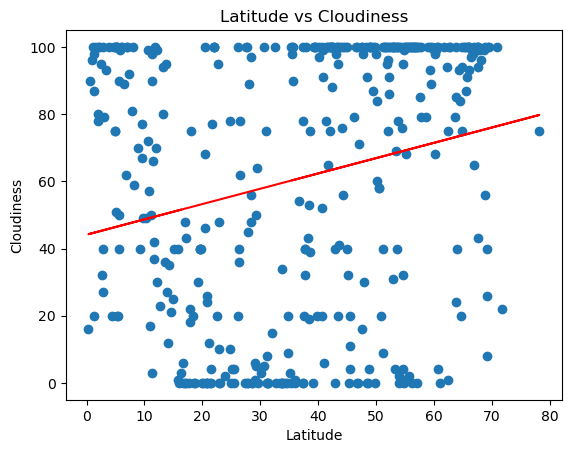

In [62]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Cloudiness")
linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

LinregressResult(slope=0.026655221622965887, intercept=63.15065559860003, rvalue=0.01008816313841395, pvalue=0.8970475527774603, stderr=0.2056866611867394, intercept_stderr=5.331989537362373)

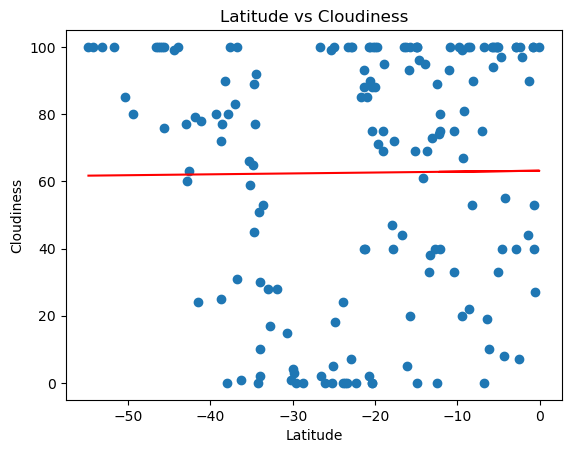

In [63]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Cloudiness")
linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** Weirdly, our data from the Northern Hemisphere has a much bigger r-value than the Southern Hemisphere. However, in either case, the r-value is not anywhere near large enough for us to consider Latitude and Cloudiness to be closely related at all.

### Wind Speed vs. Latitude Linear Regression Plot

LinregressResult(slope=0.004936911101237361, intercept=3.634974556032314, rvalue=0.03982219030506879, pvalue=0.42414766824887873, stderr=0.00617067983271869, intercept_stderr=0.25941989381273706)

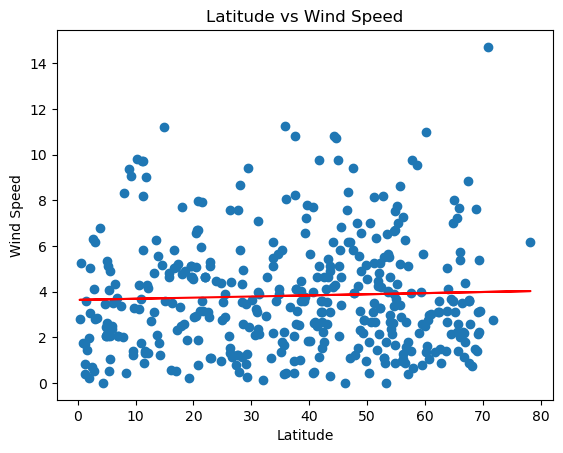

In [72]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Wind Speed")
linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

LinregressResult(slope=-0.027061888081252025, intercept=2.9378335176807417, rvalue=-0.1459234848583929, pvalue=0.059881083711673236, stderr=0.014282924118521835, intercept_stderr=0.370254451715554)

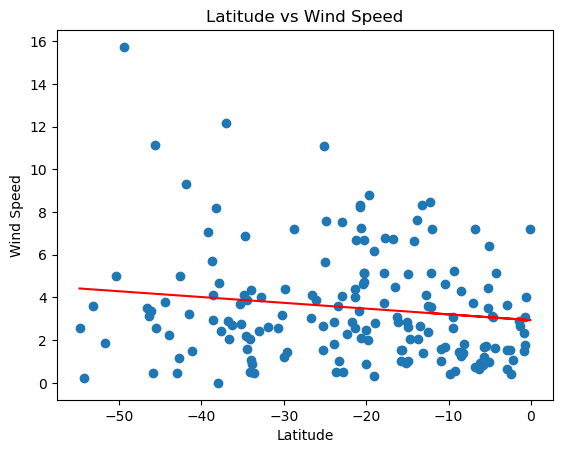

In [73]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Wind Speed")
linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** Yet again, we find loosely correlated data. Latitude is not usually a strong indicator of wind speed in general, and our data reflects that.